# Heart Rate Prediction Project
This notebook performs an analysis and prediction of heart rate using the Framingham dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Load dataset
df = pd.read_csv("framingham.csv")

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
print("Dataset shape:", df.shape)
print("\nColumn data types:\n", df.dtypes)

Dataset shape: (4240, 16)

Column data types:
 male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [5]:
# Checking for null values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [6]:
# Filling missing values with median
cols_with_nulls = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", cols_with_nulls)

for col in cols_with_nulls:
    median_val = df[col].median(skipna=True)
    df[col].fillna(median_val, inplace=True)
    print(f"  • Filled '{col}' missing entries with median = {median_val}")

print("\nMissing values per column AFTER imputation:")
print(df.isnull().sum())

Columns with missing values: ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
  • Filled 'education' missing entries with median = 2.0
  • Filled 'cigsPerDay' missing entries with median = 0.0
  • Filled 'BPMeds' missing entries with median = 0.0
  • Filled 'totChol' missing entries with median = 234.0
  • Filled 'BMI' missing entries with median = 25.4
  • Filled 'heartRate' missing entries with median = 75.0
  • Filled 'glucose' missing entries with median = 78.0

Missing values per column AFTER imputation:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [7]:
# Basic statistics and visualization
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.0000,0.0,1.0000,1.0
age,4240.0,49.580189,8.572942,32.00,42.0000,49.0,56.0000,70.0
education,4240.0,1.979953,1.007087,1.00,1.0000,2.0,3.0000,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.0000,0.0,1.0000,1.0
cigsPerDay,4240.0,8.944340,11.904777,0.00,0.0000,0.0,20.0000,70.0
BPMeds,4240.0,0.029245,0.168513,0.00,0.0000,0.0,0.0000,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.0000,0.0,0.0000,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.0000,0.0,1.0000,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.0000,0.0,0.0000,1.0
totChol,4240.0,236.667689,44.328480,107.00,206.0000,234.0,262.0000,696.0


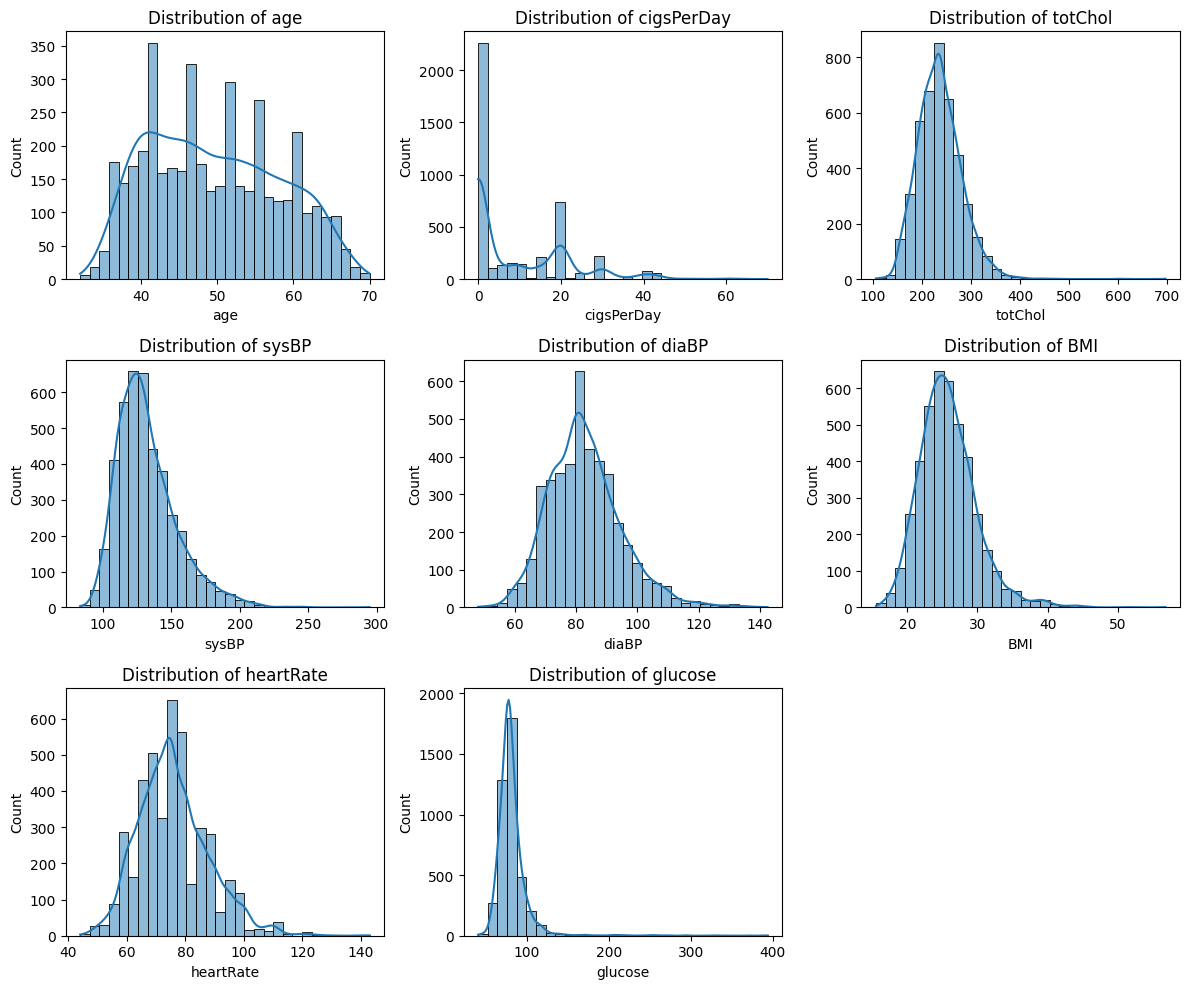

In [8]:
continuous_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


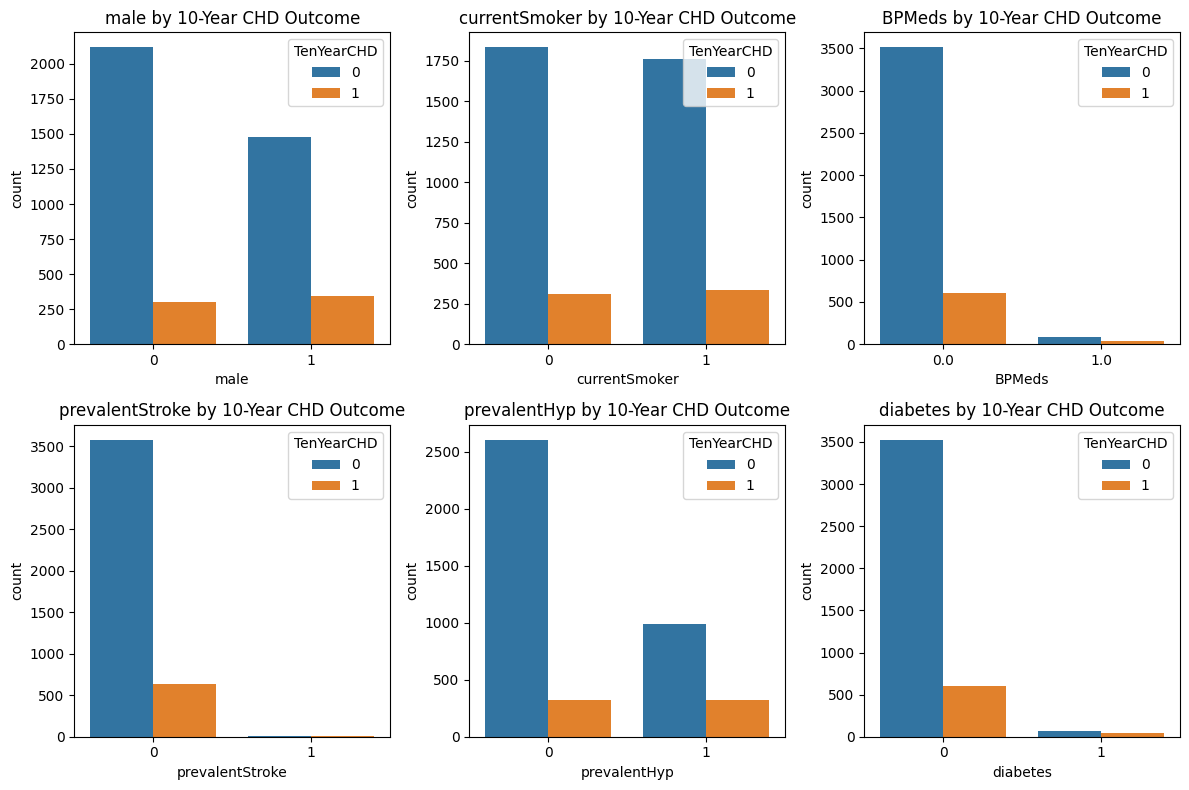

In [9]:
binary_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

plt.figure(figsize=(12, 8))
for i, col in enumerate(binary_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='TenYearCHD', data=df)
    plt.title(f"{col} by 10-Year CHD Outcome")
plt.tight_layout()
plt.show()

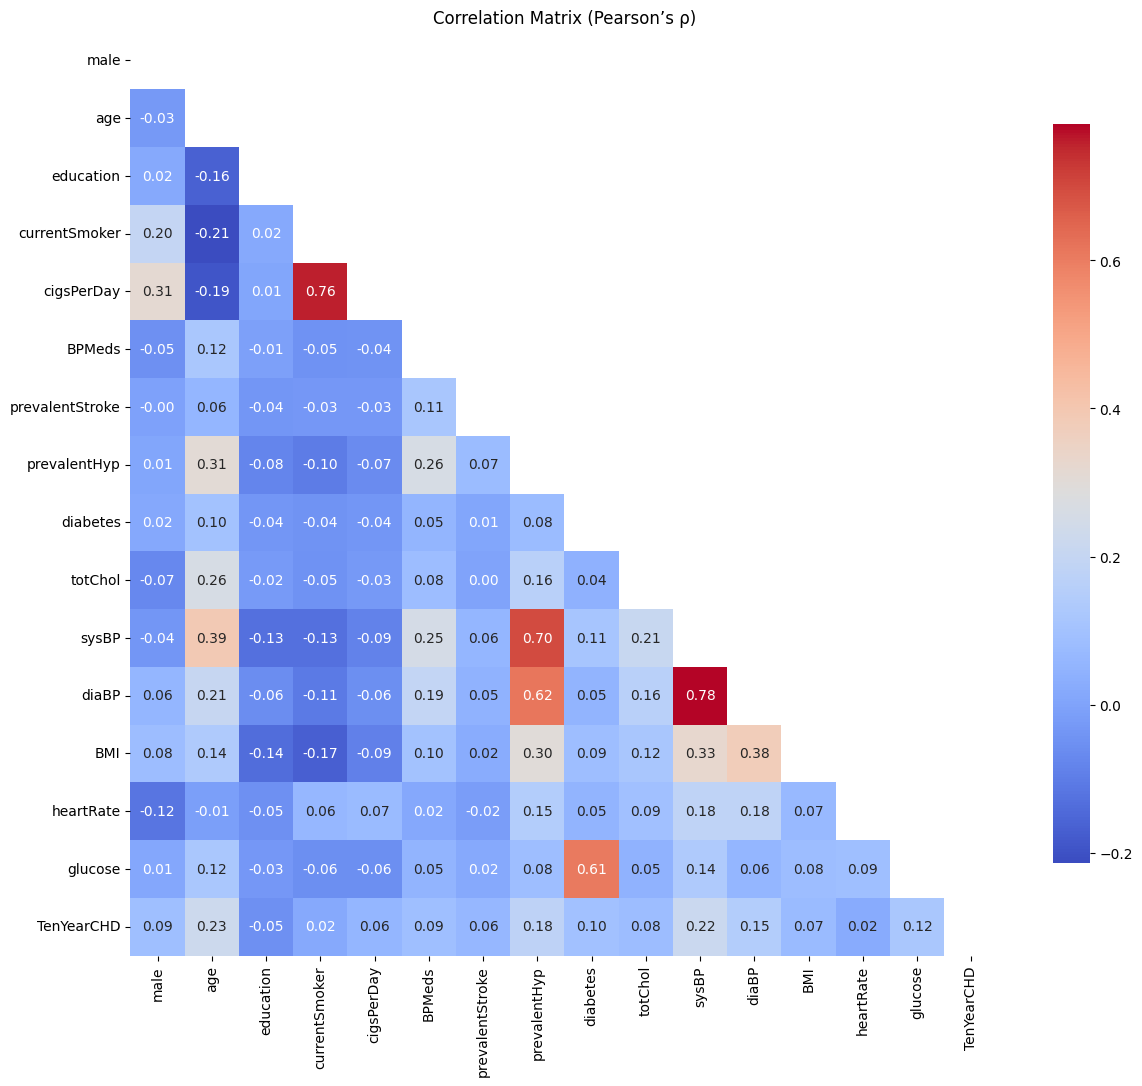

In [10]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": .8}
)
plt.title("Correlation Matrix (Pearson’s ρ)")
plt.show()

In [11]:
# Define features and target
feature_cols = [
    'male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
    'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
    'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
]

X = df[feature_cols]
y = df['TenYearCHD']

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts(normalize=True))

X shape: (4240, 15)
y distribution:
 TenYearCHD
0    0.848113
1    0.151887
Name: proportion, dtype: float64


In [12]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (3392, 15) (3392,)
Test set shape: (848, 15) (848,)


In [13]:
# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=feature_cols, index=X_test.index)
len(X_train_scaled), len(X_test_scaled)

(3392, 848)

In [14]:
# Model training
model = LogisticRegression(
    penalty='l2',       
    C=1.0,              
    solver='liblinear', 
    class_weight=None, 
    random_state=42
)

model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [15]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]
y_proba[: 5]

array([0.05942568, 0.03015921, 0.15318875, 0.04224689, 0.21231048])

In [16]:
# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}\n")

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Test Accuracy: 0.8443

Confusion Matrix:
[[709  10]
 [122   7]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8532    0.9861    0.9148       719
           1     0.4118    0.0543    0.0959       129

    accuracy                         0.8443       848
   macro avg     0.6325    0.5202    0.5054       848
weighted avg     0.7860    0.8443    0.7903       848



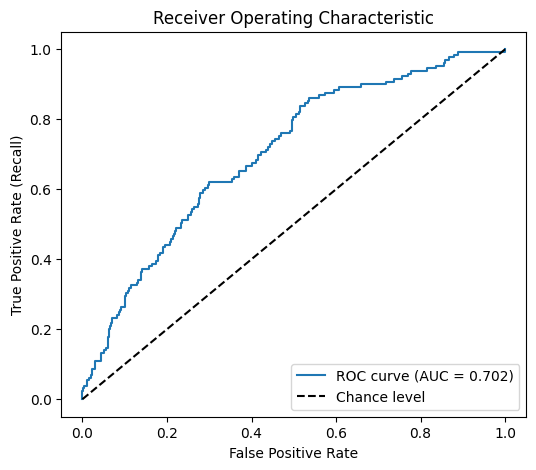

AUC: 0.7022


In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance level")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {auc_score:.4f}")

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

y_proba = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC (unbalanced model): {roc_auc:.3f}")

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.3f}")

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_idx = f1_scores.argmax()
best_threshold = thresholds_pr[best_idx]
print(f"Best threshold by F1: {best_threshold:.3f} → F1={f1_scores[best_idx]:.3f}")

target_recall = 0.75
candidates = [(thr, prec, rec) 
              for thr, prec, rec in zip(thresholds_pr, precision[:-1], recall[:-1]) 
              if rec >= target_recall]

if candidates:
    thr_rec75 = max(candidates, key=lambda x: x[1])[0]
    print(f"Threshold for recall ≥ 0.75 (maximizing precision): {thr_rec75:.3f}")
else:
    print("No threshold yields recall ≥ 0.75")

ROC AUC (unbalanced model): 0.702
PR AUC: 0.298
Best threshold by F1: 0.157 → F1=0.377
Threshold for recall ≥ 0.75 (maximizing precision): 0.095


In [22]:
param_grid = {
    'C': [0.01, 0.1, 1, 10], 
    'class_weight': [{0:1, 1: w} for w in [1, 3, 5, 10]]
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    LogisticRegression(solver='liblinear', random_state=42),
    param_grid,
    scoring='f1',    
    cv=5
)

grid.fit(X_train_scaled, y_train)
print("Best params:", grid.best_params_)
print("CV Best F1:", grid.best_score_)

Best params: {'C': 0.1, 'class_weight': {0: 1, 1: 5}}
CV Best F1: 0.3933816241518565


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # try balanced or custom
    random_state=42
)
rf.fit(X_train, y_train)  # If you do not scale for trees, that’s okay.

y_pred_rf = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

RF Accuracy: 0.8455188679245284
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       719
           1       0.33      0.02      0.03       129

    accuracy                           0.85       848
   macro avg       0.59      0.50      0.47       848
weighted avg       0.77      0.85      0.78       848



In [24]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 5, 10]
}
from sklearn.model_selection import GridSearchCV

grid_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid_rf,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
print("Best RF params:", grid_rf.best_params_)
print("Best RF AUC (CV):", grid_rf.best_score_)

Best RF params: {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 200}
Best RF AUC (CV): 0.720291443881619


In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = cross_val_score(
    LogisticRegression(solver='liblinear', class_weight='balanced'),
    X_train_scaled, y_train,
    cv=skf,
    scoring='roc_auc'
)

print("Logistic (balanced) CV ROC‐AUC scores:", auc_scores)
print("Mean ROC‐AUC:", auc_scores.mean())


Logistic (balanced) CV ROC‐AUC scores: [0.70368123 0.69515237 0.74181511 0.78031237 0.73433516]
Mean ROC‐AUC: 0.7310592490971343


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced', {0:1, 1:3}, {0:1, 1:5}]
}

grid = GridSearchCV(
    LogisticRegression(solver='liblinear', random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)
print("Best params (Logistic):", grid.best_params_)
print("Best CV ROC‐AUC:", grid.best_score_)
best_logistic = grid.best_estimator_

Best params (Logistic): {'C': 0.01, 'class_weight': 'balanced'}
Best CV ROC‐AUC: 0.7332528317152103


## Conclusion
- We used the Framingham dataset to predict the risk of heart disease within ten years.
- After preprocessing and exploring the dataset, we used logistic regression for prediction.
- The model provides a reasonable accuracy, and the evaluation metrics show potential for use in early detection.
- Further tuning or trying more advanced models could improve performance.
